## Movie industry 1980 - 2020

### Quentions to wonder about this dataset:

<li>How can factors like the movie director, company, genre or score reflect on the movie gross revenue?</li>
<li>What genres of movies are more profitable?</li>
<li>What kind of rating would get a better return?</li>

###### Content
### There are 7668 movies in the dataset (1980-2020). Each movie has the following attributes:

###### budget: the budget of a movie. Some movies don't have this, so it appears as 0
###### company: the production company
###### country: country of origin
###### director: the director
###### genre: main genre of the movie.
###### gross: revenue of the movie
###### name: name of the movie
###### rating: rating of the movie (R, PG, etc.)
###### released: release date (YYYY-MM-DD)
###### runtime: duration of the movie
###### score: IMDb user rating
###### votes: number of user votes
###### star: main actor/actress
###### writer: writer of the movie
###### year: year of release

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movies.csv')

In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

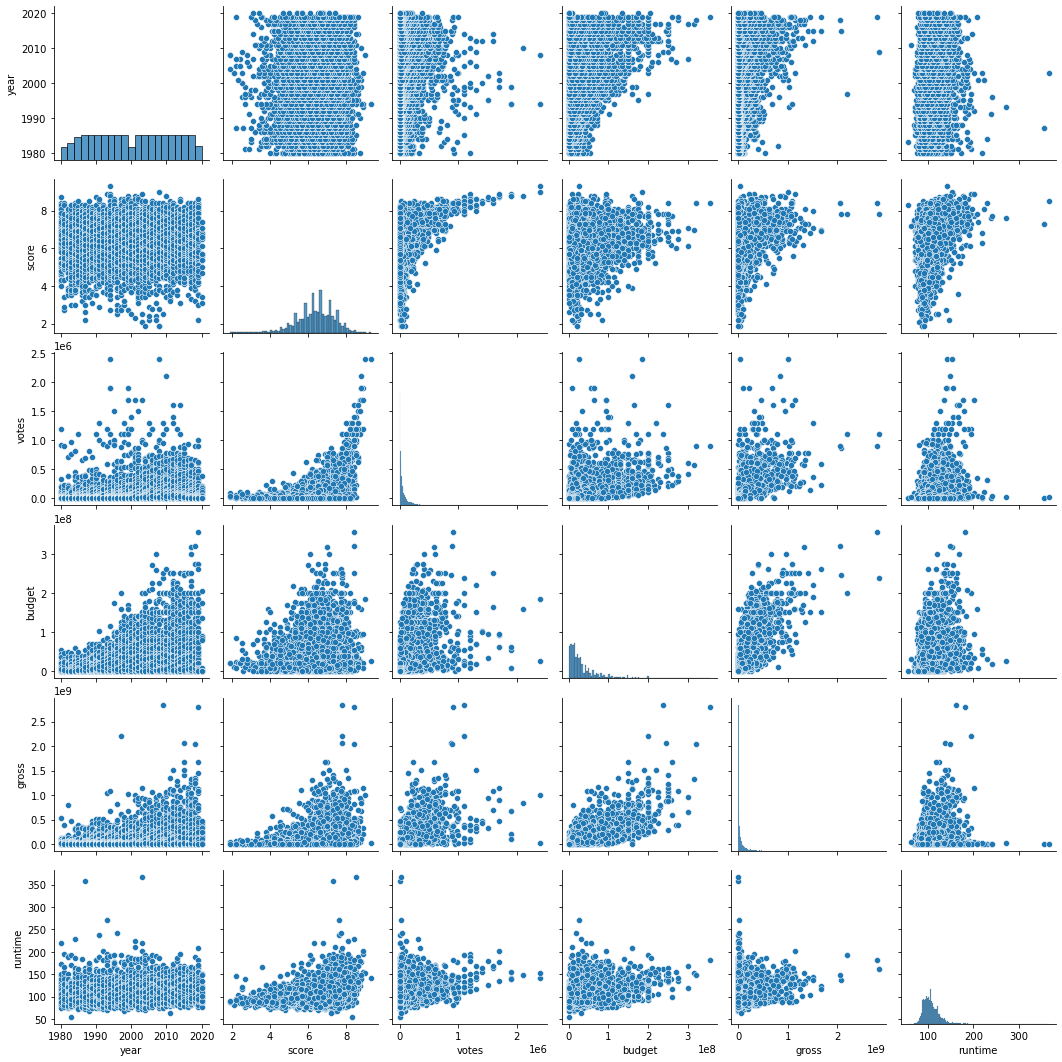

In [5]:
sns.pairplot(df)

<AxesSubplot:>

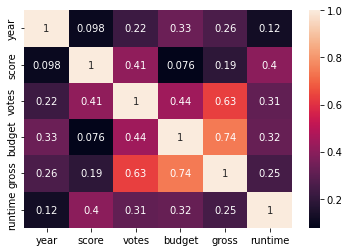

In [6]:
sns.heatmap(df.corr(), annot=True)

## Correlation graph indicates a better relationship between butched and gross

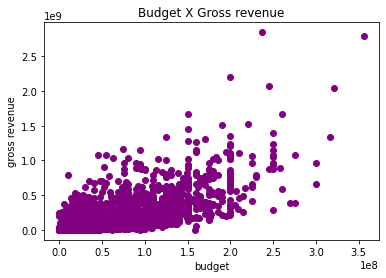

In [7]:
plt.scatter(df['budget'], df['gross'], color='purple')
plt.title('Budget X Gross revenue')
plt.xlabel('budget')
plt.ylabel('gross revenue')
plt.show()

## Also the graph indicates a good relationship between votes and gross

Text(0, 0.5, 'Gross revenue')

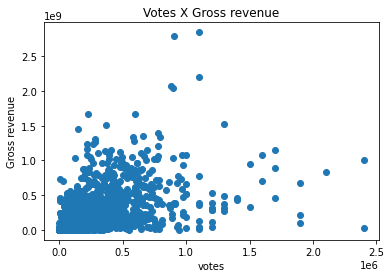

In [8]:
plt.scatter(df.votes, df.gross)
plt.title('Votes X Gross revenue')
plt.xlabel('votes')
plt.ylabel('Gross revenue')

<AxesSubplot:xlabel='budget', ylabel='gross'>

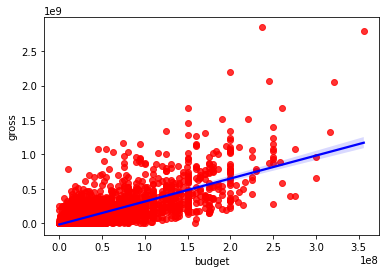

In [9]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

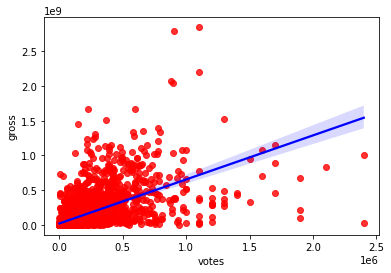

In [10]:
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [11]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


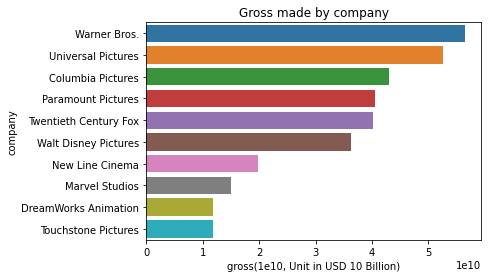

In [12]:
df_comp_sum = df.groupby("company")['gross'].sum()
df_comp_sum = df_comp_sum.reset_index().sort_values('gross', ascending=False)
sns.barplot(x='gross', y='company', data=df_comp_sum[:10])
plt.title('Gross made by company')
plt.xlabel('gross(1e10, Unit in USD 10 Billion)')
plt.show()

## How much gross revenue made by company

In [13]:
df.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

Text(0.5, 0, 'gross(1e10, Unit in USD 10 Billion)')

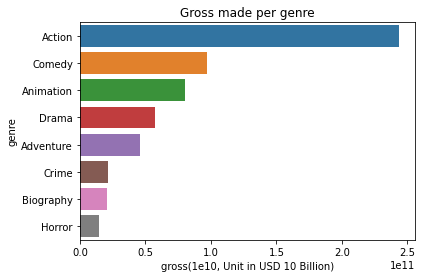

In [14]:
df_genre_sum = df.groupby('genre')['gross'].sum()
df_genre_sum = df_genre_sum.reset_index().sort_values('gross', ascending=False)
sns.barplot(x = 'gross', y = 'genre', data=df_genre_sum[:8])
plt.title('Gross made per genre')
plt.xlabel('gross(1e10, Unit in USD 10 Billion)')

## How much gross revenue made by genre

In [15]:
df.groupby(['year']).score.max()

year
1980    8.7
1981    8.4
1982    8.1
1983    8.3
1984    8.4
1985    8.5
1986    8.3
1987    8.3
1988    8.5
1989    8.2
1990    8.7
1991    8.6
1992    8.3
1993    8.9
1994    9.3
1995    8.6
1996    8.1
1997    8.6
1998    8.6
1999    8.8
2000    8.5
2001    8.8
2002    8.7
2003    8.9
2004    8.5
2005    8.2
2006    8.5
2007    8.4
2008    9.0
2009    8.4
2010    8.8
2011    8.5
2012    8.4
2013    8.2
2014    8.6
2015    8.2
2016    8.4
2017    8.4
2018    8.4
2019    8.6
2020    7.4
Name: score, dtype: float64

In [16]:
df.groupby(['year']).gross.max()

year
1980    5.383751e+08
1981    3.899260e+08
1982    7.929106e+08
1983    4.751062e+08
1984    3.331073e+08
1985    3.819068e+08
1986    3.572882e+08
1987    3.201457e+08
1988    3.548254e+08
1989    4.741718e+08
1990    5.057036e+08
1991    5.208812e+08
1992    5.040502e+08
1993    1.033928e+09
1994    1.083721e+09
1995    3.944366e+08
1996    8.174009e+08
1997    2.201647e+09
1998    5.537098e+08
1999    1.027083e+09
2000    5.463881e+08
2001    1.006968e+09
2002    9.474951e+08
2003    1.146031e+09
2004    9.287608e+08
2005    8.966782e+08
2006    1.066180e+09
2007    9.609965e+08
2008    1.005974e+09
2009    2.847246e+09
2010    1.066971e+09
2011    1.342322e+09
2012    1.518816e+09
2013    1.281508e+09
2014    1.104054e+09
2015    2.069522e+09
2016    1.153337e+09
2017    1.332699e+09
2018    2.048360e+09
2019    2.797501e+09
2020    4.614216e+08
Name: gross, dtype: float64